In [131]:
# Importing Libraries

import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import matplotlib.pyplot as plt

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import collections
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Low Conversion", "High Conversion"]

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [132]:
import pandas as pd

missing_value = ["n.a.","NA","n/a", "na", "NaN", "NULL", "None"]

data = pd.read_excel("Dataset.xlsx", na_values = missing_value)
data.head()

,Customer_ID,Gender,Age,Boxes_Purchased_Cnt,Last_Purchase_Date,Unique_Emails_Sent,Open_Rate,Click_to_Open_Rate,Email_Unsubscribe_Ind,Email_Unsubscribe_Date,Customer_Status,Status_Cancel_Date
0,1,F,25 to 34,2,2020-11-01 00:00:00,10 to 19,0,0,0,NaT,active,NaT
1,2,M,45 to 54,1,2020-05-01 00:00:00,10 to 19,>50% to 75%,>0% to 10%,1,2020-08-04,cancel,2020-05-01
2,3,M,35 to 44,2,Before 2020,20 to 29,>25% to 50%,>25%,0,NaT,active,NaT
3,4,F,55+,2,2020-08-01 00:00:00,20 to 29,0,0,1,2020-09-02,active,NaT
4,5,M,25 to 34,2,2020-02-01 00:00:00,NaN,0,0,1,2019-08-31,active,NaT


In [133]:
data.isnull().max()

Customer_ID               False
Gender                     True
Age                       False
Boxes_Purchased_Cnt       False
Last_Purchase_Date        False
Unique_Emails_Sent         True
Open_Rate                 False
Click_to_Open_Rate        False
Email_Unsubscribe_Ind     False
Email_Unsubscribe_Date     True
Customer_Status           False
Status_Cancel_Date         True
dtype: bool

In [134]:
len(data)

4000

In [135]:
print('Active Subscriptions are', round(data['Customer_Status'].str.contains('active').sum()/len(data) * 100,2), '% of the dataset')
print('Canceled Subscriptions are', round(data['Customer_Status'].str.contains('cancel').sum()/len(data) * 100,2), '% of the dataset')

Active Subscriptions are 90.52 % of the dataset
Canceled Subscriptions are 9.48 % of the dataset


Text(0.5, 1.0, 'Distribution of 2 classes \n (1: Active || 0: Canceled)')

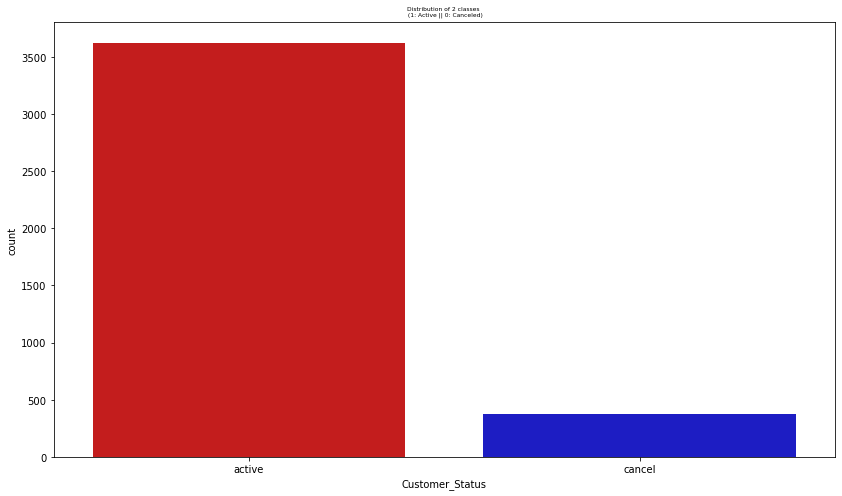

In [136]:
colors = ["#DF0101", "#0101DF"]
sns.countplot('Customer_Status', data=data, palette=colors)
plt.title('Distribution of 2 classes \n (1: Active || 0: Canceled)', fontsize=6)

In [137]:
print(data.isnull().sum())

Customer_ID                  0
Gender                     255
Age                          0
Boxes_Purchased_Cnt          0
Last_Purchase_Date           0
Unique_Emails_Sent         196
Open_Rate                    0
Click_to_Open_Rate           0
Email_Unsubscribe_Ind        0
Email_Unsubscribe_Date    3476
Customer_Status              0
Status_Cancel_Date        3627
dtype: int64


In [138]:
# Finding the mode of Gender
data['Gender'].mode()

0    F
dtype: object

In [139]:
data['Gender'].fillna('F', inplace=True)


In [140]:
print(data.isnull().sum())

Customer_ID                  0
Gender                       0
Age                          0
Boxes_Purchased_Cnt          0
Last_Purchase_Date           0
Unique_Emails_Sent         196
Open_Rate                    0
Click_to_Open_Rate           0
Email_Unsubscribe_Ind        0
Email_Unsubscribe_Date    3476
Customer_Status              0
Status_Cancel_Date        3627
dtype: int64


In [141]:
data['Email_Unsubscribe_Date'].isnull().sum()


3476

In [142]:
data['Status_Cancel_Date'].isnull().sum()

3627

In [143]:
data.drop(['Email_Unsubscribe_Date'], axis = 1, inplace = True)
data.drop(['Status_Cancel_Date'], axis = 1, inplace = True)

data.head()

,Customer_ID,Gender,Age,Boxes_Purchased_Cnt,Last_Purchase_Date,Unique_Emails_Sent,Open_Rate,Click_to_Open_Rate,Email_Unsubscribe_Ind,Customer_Status
0,1,F,25 to 34,2,2020-11-01 00:00:00,10 to 19,0,0,0,active
1,2,M,45 to 54,1,2020-05-01 00:00:00,10 to 19,>50% to 75%,>0% to 10%,1,cancel
2,3,M,35 to 44,2,Before 2020,20 to 29,>25% to 50%,>25%,0,active
3,4,F,55+,2,2020-08-01 00:00:00,20 to 29,0,0,1,active
4,5,M,25 to 34,2,2020-02-01 00:00:00,NaN,0,0,1,active


In [144]:
data['Age'].unique()

array(['25 to 34', '45 to 54', '35 to 44', '55+', '18 to 24'],
      dtype=object)

In [145]:
def age_mean(x):
    if x == '25 to 34':
        return int((25+34)/2)
    elif x == '45 to 54':
        return int((45+54)/2)
    elif x == '35 to 44':
        return int((35+44)/2)
    elif x == '18 to 24':
        return int((18+24)/2)
    elif x == '55+':
        return 55

In [146]:
data['mean_age'] = data['Age'].apply(age_mean)
mean_age = data['mean_age']

In [147]:
data.drop(['Age'], axis = 1 , inplace = True)

In [148]:
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Unique_Emails_Sent,Open_Rate,Click_to_Open_Rate,Email_Unsubscribe_Ind,Customer_Status,mean_age
0,1,F,2,2020-11-01 00:00:00,10 to 19,0,0,0,active,29
1,2,M,1,2020-05-01 00:00:00,10 to 19,>50% to 75%,>0% to 10%,1,cancel,49
2,3,M,2,Before 2020,20 to 29,>25% to 50%,>25%,0,active,39
3,4,F,2,2020-08-01 00:00:00,20 to 29,0,0,1,active,55
4,5,M,2,2020-02-01 00:00:00,NaN,0,0,1,active,29


In [149]:
data['Unique_Emails_Sent'] = data['Unique_Emails_Sent'].fillna(0)
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Unique_Emails_Sent,Open_Rate,Click_to_Open_Rate,Email_Unsubscribe_Ind,Customer_Status,mean_age
0,1,F,2,2020-11-01 00:00:00,10 to 19,0,0,0,active,29
1,2,M,1,2020-05-01 00:00:00,10 to 19,>50% to 75%,>0% to 10%,1,cancel,49
2,3,M,2,Before 2020,20 to 29,>25% to 50%,>25%,0,active,39
3,4,F,2,2020-08-01 00:00:00,20 to 29,0,0,1,active,55
4,5,M,2,2020-02-01 00:00:00,0,0,0,1,active,29


In [150]:
print(data.isnull().sum())

Customer_ID              0
Gender                   0
Boxes_Purchased_Cnt      0
Last_Purchase_Date       0
Unique_Emails_Sent       0
Open_Rate                0
Click_to_Open_Rate       0
Email_Unsubscribe_Ind    0
Customer_Status          0
mean_age                 0
dtype: int64


In [151]:
data['Unique_Emails_Sent'].unique()

array(['10 to 19', '20 to 29', 0, '30 to 49', 'Less than 10', '50+'],
      dtype=object)

In [152]:
def email_mean(y):
    if y == '10 to 19':
        return int((10+19)/2)
    elif y == '20 to 29':
        return int((20+29)/2)
    elif y == '30 to 49':
        return int((30+49)/2)
    elif y == 'Less than 10':
        return 10
    elif y == '50+':
        return 50
    elif y == 0 :
        return 0

In [153]:
data['mean_num_email_sent'] = data['Unique_Emails_Sent'].apply(email_mean)
mean_num_email_sent = data['mean_num_email_sent']

In [154]:
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Unique_Emails_Sent,Open_Rate,Click_to_Open_Rate,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent
0,1,F,2,2020-11-01 00:00:00,10 to 19,0,0,0,active,29,14
1,2,M,1,2020-05-01 00:00:00,10 to 19,>50% to 75%,>0% to 10%,1,cancel,49,14
2,3,M,2,Before 2020,20 to 29,>25% to 50%,>25%,0,active,39,24
3,4,F,2,2020-08-01 00:00:00,20 to 29,0,0,1,active,55,24
4,5,M,2,2020-02-01 00:00:00,0,0,0,1,active,29,0


In [155]:
data.drop(['Unique_Emails_Sent'], axis = 1 , inplace = True)

In [156]:
data['Open_Rate'].unique()

array([0, '>50% to 75%', '>25% to 50%', '>0% to 25%', '>75%'],
      dtype=object)

In [157]:
def open_rate_average(z):
    if z == '>50% to 75%':
        return (50+75)/2
    elif z == '>25% to 50%':
        return (25+50)/2
    elif z == '>0% to 25%':
        return (25)/2
    elif z == '>75%':
        return (75+100)/2
    elif z == 0:
        return 0
    

In [158]:
data['open_rate_avg'] = data['Open_Rate'].apply(open_rate_average)
open_rate_avg = data['open_rate_avg']
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Open_Rate,Click_to_Open_Rate,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg
0,1,F,2,2020-11-01 00:00:00,0,0,0,active,29,14,0.0
1,2,M,1,2020-05-01 00:00:00,>50% to 75%,>0% to 10%,1,cancel,49,14,62.5
2,3,M,2,Before 2020,>25% to 50%,>25%,0,active,39,24,37.5
3,4,F,2,2020-08-01 00:00:00,0,0,1,active,55,24,0.0
4,5,M,2,2020-02-01 00:00:00,0,0,1,active,29,0,0.0


In [159]:
data.drop(['Open_Rate'], axis = 1, inplace = True)

In [160]:
data['Click_to_Open_Rate'].unique()

array([0, '>0% to 10%', '>25%', '>15% to 25%', '>10% to 15%'],
      dtype=object)

In [161]:
def click_to_open_rate_average(h):
    if h == '>0% to 10%':
        return (10)/2
    elif h == '>25%':
        return (25+30)/2
    elif h == '>15% to 25%':
        return (15+25)/2
    elif h == '>10% to 15%':
        return (10+15)/2
    elif h == 0:
        return 0

In [162]:
data['click_to_open_rate_avg'] = data['Click_to_Open_Rate'].apply(click_to_open_rate_average)
click_to_open_rate_avg = data['click_to_open_rate_avg']
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Click_to_Open_Rate,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg,click_to_open_rate_avg
0,1,F,2,2020-11-01 00:00:00,0,0,active,29,14,0.0,0.0
1,2,M,1,2020-05-01 00:00:00,>0% to 10%,1,cancel,49,14,62.5,5.0
2,3,M,2,Before 2020,>25%,0,active,39,24,37.5,27.5
3,4,F,2,2020-08-01 00:00:00,0,1,active,55,24,0.0,0.0
4,5,M,2,2020-02-01 00:00:00,0,1,active,29,0,0.0,0.0


In [163]:
data.drop(['Click_to_Open_Rate'], axis = 1, inplace = True)
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg,click_to_open_rate_avg
0,1,F,2,2020-11-01 00:00:00,0,active,29,14,0.0,0.0
1,2,M,1,2020-05-01 00:00:00,1,cancel,49,14,62.5,5.0
2,3,M,2,Before 2020,0,active,39,24,37.5,27.5
3,4,F,2,2020-08-01 00:00:00,1,active,55,24,0.0,0.0
4,5,M,2,2020-02-01 00:00:00,1,active,29,0,0.0,0.0


In [164]:
data['Last_Purchase_Date'].unique()

array([datetime.datetime(2020, 11, 1, 0, 0),
       datetime.datetime(2020, 5, 1, 0, 0), 'Before 2020',
       datetime.datetime(2020, 8, 1, 0, 0),
       datetime.datetime(2020, 2, 1, 0, 0),
       datetime.datetime(2020, 12, 1, 0, 0),
       datetime.datetime(2020, 3, 1, 0, 0),
       datetime.datetime(2020, 7, 1, 0, 0),
       datetime.datetime(2020, 9, 1, 0, 0),
       datetime.datetime(2020, 1, 1, 0, 0),
       datetime.datetime(2020, 4, 1, 0, 0),
       datetime.datetime(2020, 10, 1, 0, 0),
       datetime.datetime(2020, 6, 1, 0, 0)], dtype=object)

In [165]:
data['Last_Purchase_Date'].dtype
print(data.dtypes)

Customer_ID                 int64
Gender                     object
Boxes_Purchased_Cnt         int64
Last_Purchase_Date         object
Email_Unsubscribe_Ind       int64
Customer_Status            object
mean_age                    int64
mean_num_email_sent         int64
open_rate_avg             float64
click_to_open_rate_avg    float64
dtype: object


In [166]:
data.Last_Purchase_Date[data.Last_Purchase_Date == 'Before 2020'] = '2019-12-01 00:00:00'


In [167]:
data['Last_Purchase_Date'] = pd.to_datetime(data['Last_Purchase_Date'])
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg,click_to_open_rate_avg
0,1,F,2,2020-11-01,0,active,29,14,0.0,0.0
1,2,M,1,2020-05-01,1,cancel,49,14,62.5,5.0
2,3,M,2,2019-12-01,0,active,39,24,37.5,27.5
3,4,F,2,2020-08-01,1,active,55,24,0.0,0.0
4,5,M,2,2020-02-01,1,active,29,0,0.0,0.0


In [168]:
print(data.dtypes)


Customer_ID                        int64
Gender                            object
Boxes_Purchased_Cnt                int64
Last_Purchase_Date        datetime64[ns]
Email_Unsubscribe_Ind              int64
Customer_Status                   object
mean_age                           int64
mean_num_email_sent                int64
open_rate_avg                    float64
click_to_open_rate_avg           float64
dtype: object


In [169]:
import datetime as dt
def purchase(s): 
    if s.year == 2020:
        return 1
    else:
        return 0

In [170]:
data['Purchase_in_2020'] = data['Last_Purchase_Date'].apply(purchase)
purchase_in_2020 = data['Purchase_in_2020']
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg,click_to_open_rate_avg,Purchase_in_2020
0,1,F,2,2020-11-01,0,active,29,14,0.0,0.0,1
1,2,M,1,2020-05-01,1,cancel,49,14,62.5,5.0,1
2,3,M,2,2019-12-01,0,active,39,24,37.5,27.5,0
3,4,F,2,2020-08-01,1,active,55,24,0.0,0.0,1
4,5,M,2,2020-02-01,1,active,29,0,0.0,0.0,1


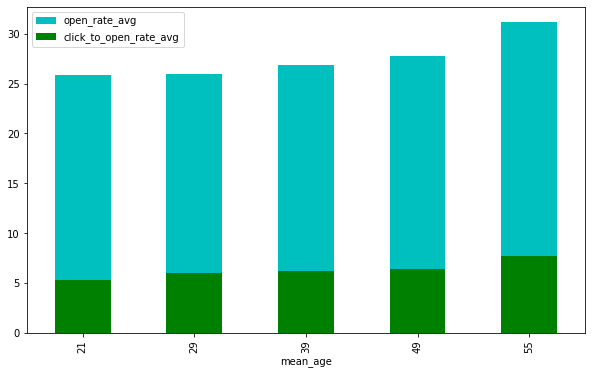

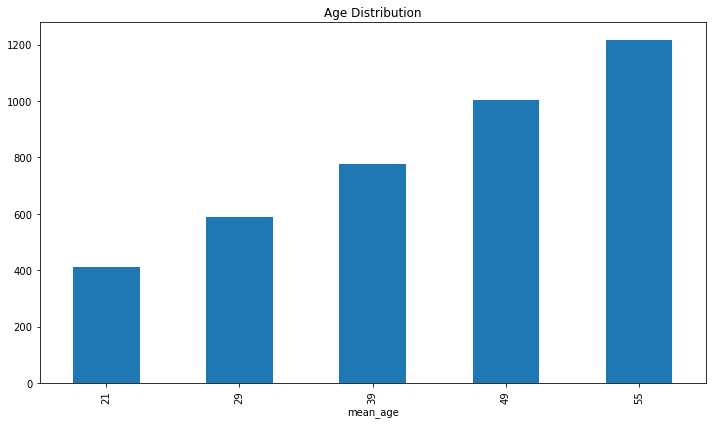

In [171]:
data.groupby('mean_age')['open_rate_avg'].mean().plot.bar(color = 'c', figsize = (10,6))
data.groupby('mean_age')['click_to_open_rate_avg'].mean().plot.bar(color = 'g', figsize = (10,6))
plt.legend()
plt.show()
# plt.savefig(r'C:\Users\Simas\Desktop\fig.jpg')

x = data.groupby('mean_age')['Customer_ID'].count() #/len(data)
x.plot.bar(figsize = (10,6))
plt.title('Age Distribution')
plt.tight_layout()

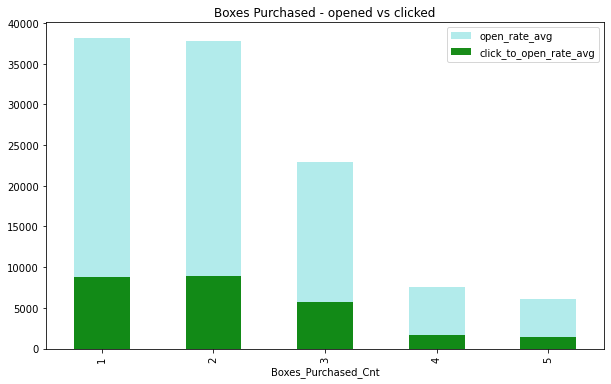

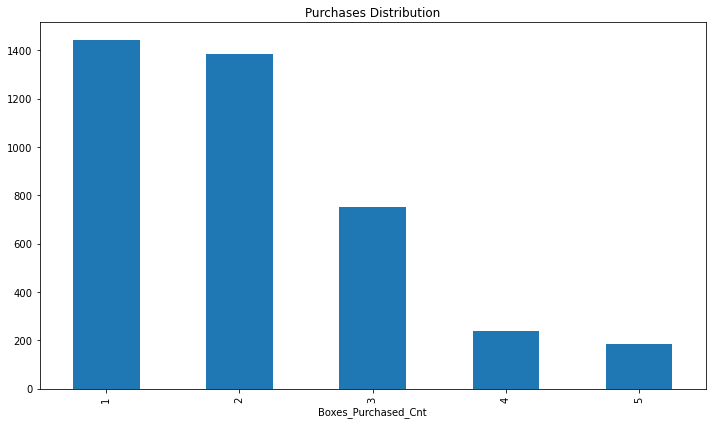

In [172]:

y = data.groupby('Boxes_Purchased_Cnt')['click_to_open_rate_avg'].sum()
x = data.groupby('Boxes_Purchased_Cnt')['open_rate_avg'].sum()

x.plot.bar(color = 'c',alpha = 0.3, figsize = (10,6))
y.plot.bar(color = 'g',alpha = 0.9, figsize = (10,6))
plt.legend()
plt.bar(x,height = 10)
plt.title('Boxes Purchased - opened vs clicked')
plt.show()
x = data.groupby('Boxes_Purchased_Cnt')['Customer_ID'].count() #/len(data)
x.plot.bar(figsize = (10,6))
plt.title('Purchases Distribution')
plt.tight_layout()




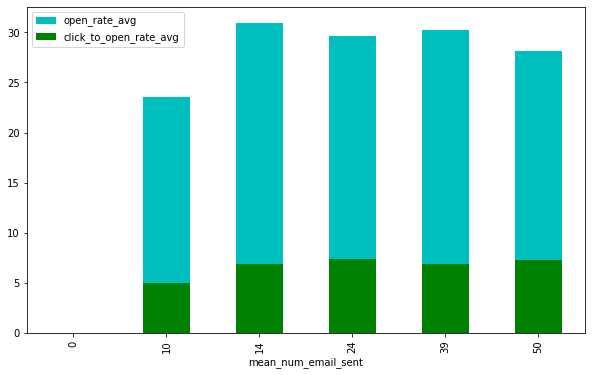

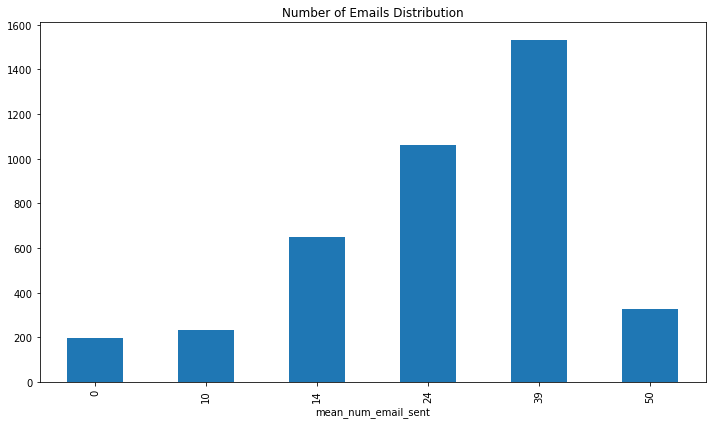

In [173]:
data.groupby('mean_num_email_sent')['open_rate_avg'].mean().plot.bar(color = 'c', figsize = (10,6))
data.groupby('mean_num_email_sent')['click_to_open_rate_avg'].mean().plot.bar(color = 'g', figsize = (10,6))
plt.legend()
plt.show()
x = data.groupby('mean_num_email_sent')['Customer_ID'].count() #/len(data)
x.plot.bar( figsize = (10,6))
plt.title('Number of Emails Distribution')
plt.tight_layout()

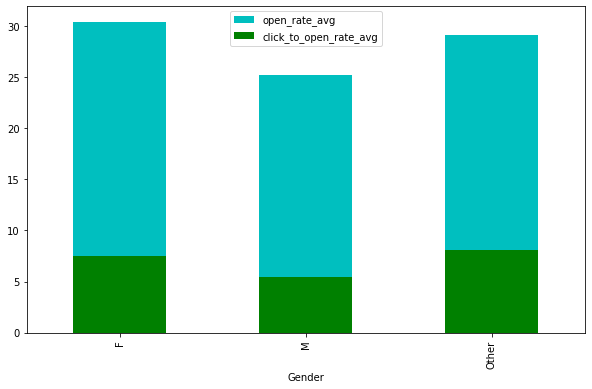

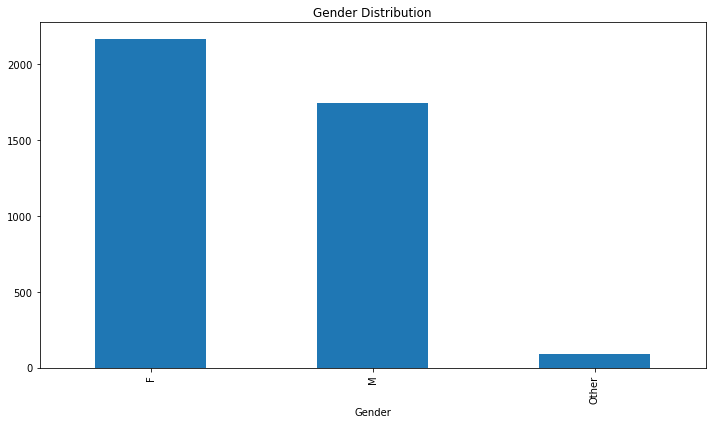

In [174]:
data.groupby('Gender')['open_rate_avg'].mean().plot.bar(color = 'c', figsize = (10,6))
data.groupby('Gender')['click_to_open_rate_avg'].mean().plot.bar(color = 'g', figsize = (10,6))
plt.legend()
plt.show()
x = data.groupby('Gender')['Customer_ID'].count() #/len(data)
x.plot.bar(figsize = (10,6))
plt.title('Gender Distribution')
plt.tight_layout()

In [175]:
base = data['Last_Purchase_Date'].max()
data['days_since_last_purchase'] = base - data['Last_Purchase_Date']
data['days_since_last_purchase']
data['days_since_last_purchase'] = (data['days_since_last_purchase']).dt.days
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg,click_to_open_rate_avg,Purchase_in_2020,days_since_last_purchase
0,1,F,2,2020-11-01,0,active,29,14,0.0,0.0,1,30
1,2,M,1,2020-05-01,1,cancel,49,14,62.5,5.0,1,214
2,3,M,2,2019-12-01,0,active,39,24,37.5,27.5,0,366
3,4,F,2,2020-08-01,1,active,55,24,0.0,0.0,1,122
4,5,M,2,2020-02-01,1,active,29,0,0.0,0.0,1,304


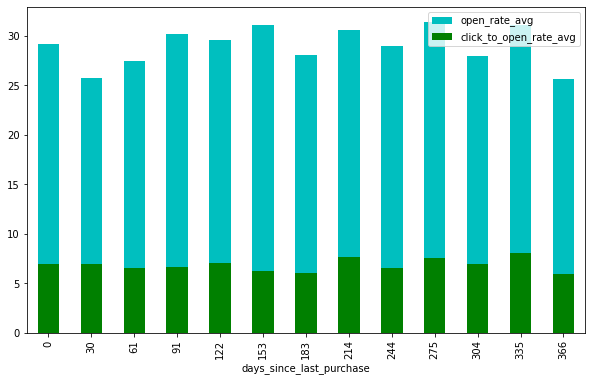

In [176]:
data.groupby('days_since_last_purchase')['open_rate_avg'].mean().plot.bar(color = 'c', figsize = (10,6))
data.groupby('days_since_last_purchase')['click_to_open_rate_avg'].mean().plot.bar(color = 'g', figsize = (10,6))
plt.legend()
plt.show()

In [177]:
data['conversion'] = round(data['open_rate_avg']*data['click_to_open_rate_avg']/100, 2)

In [178]:
data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg,click_to_open_rate_avg,Purchase_in_2020,days_since_last_purchase,conversion
0,1,F,2,2020-11-01,0,active,29,14,0.0,0.0,1,30,0.00
1,2,M,1,2020-05-01,1,cancel,49,14,62.5,5.0,1,214,3.12
2,3,M,2,2019-12-01,0,active,39,24,37.5,27.5,0,366,10.31
3,4,F,2,2020-08-01,1,active,55,24,0.0,0.0,1,122,0.00
4,5,M,2,2020-02-01,1,active,29,0,0.0,0.0,1,304,0.00


In [179]:
data['conversion'].unique()

array([ 0.  ,  3.12, 10.31,  1.88,  7.5 ,  7.81,  0.62,  2.5 ,  4.69,
       10.94,  1.56,  3.44, 17.19,  4.38, 12.5 , 24.06, 17.5 ])

<AxesSubplot:>

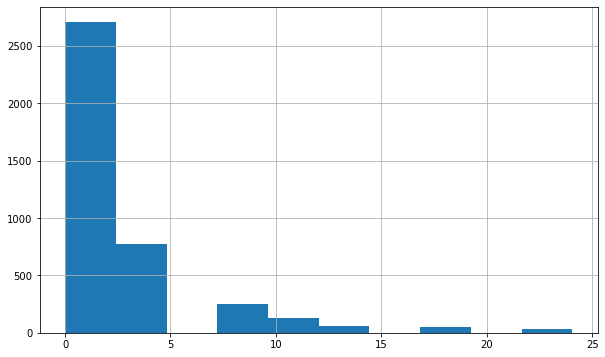

In [180]:
data['conversion'].hist(figsize = (10,6))

In [181]:
# We assume that a conversion rate of 5% and above is high and we show it with 1.

def mapper(x):
    if x>= 5:
        return 1
    elif x< 5:
        return 0
data['conversion_binary'] = data['conversion'].apply(mapper)
conversion_binary = data['conversion_binary']


In [182]:
data[data['conversion_binary'] == 1]

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg,click_to_open_rate_avg,Purchase_in_2020,days_since_last_purchase,conversion,conversion_binary
2,3,M,2,2019-12-01,0,active,39,24,37.5,27.5,0,366,10.31,1
8,9,M,2,2020-12-01,0,active,39,39,37.5,20.0,1,0,7.50,1
21,22,F,5,2020-05-01,0,active,39,14,62.5,12.5,1,214,7.81,1
28,29,M,1,2020-12-01,0,active,29,14,37.5,20.0,1,0,7.50,1
30,31,M,1,2019-12-01,0,cancel,29,39,87.5,12.5,0,366,10.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,3953,M,1,2019-12-01,0,cancel,49,39,62.5,12.5,0,366,7.81,1
3956,3957,F,1,2020-10-01,0,active,29,24,37.5,27.5,1,61,10.31,1
3978,3979,F,2,2019-12-01,1,active,49,39,37.5,20.0,0,366,7.50,1
3986,3987,F,3,2020-02-01,0,active,55,39,37.5,27.5,1,304,10.31,1


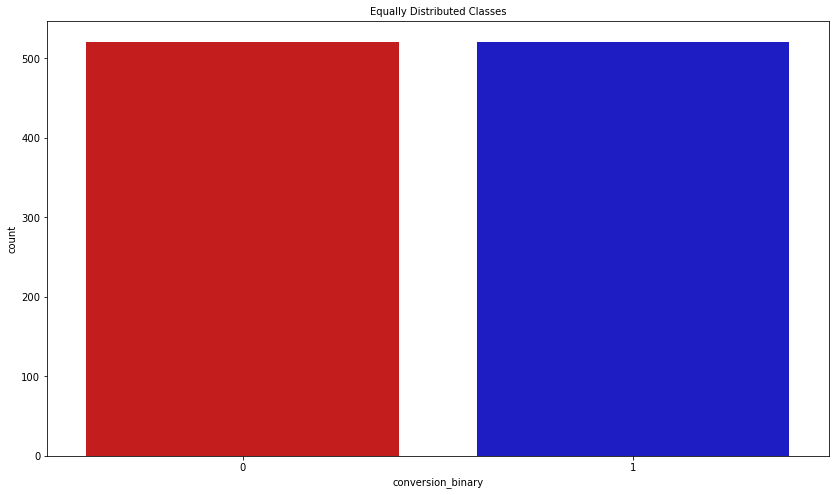

In [183]:
# Handling imbalanced structure of the data with undersampling the overpresented class 
# Just for building the model not for testing!(avoiding overfitting)
# I shuffle the data before creating the sub sample
data1 = data.sample(frac=1, random_state=42)

# amount of high conversion classes 86 rows.
high_data = data1.loc[data1['conversion_binary'] == 1]
low_data = data1.loc[data1['conversion_binary'] == 0][:521]

normal_distributed_data = pd.concat([high_data, low_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)


sns.countplot('conversion_binary', data=new_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=10)
plt.show()

In [184]:
new_data['conversion'].mean()

6.083301343570077

In [185]:
new_data['conversion'].median()

6.095000000000001

<AxesSubplot:>

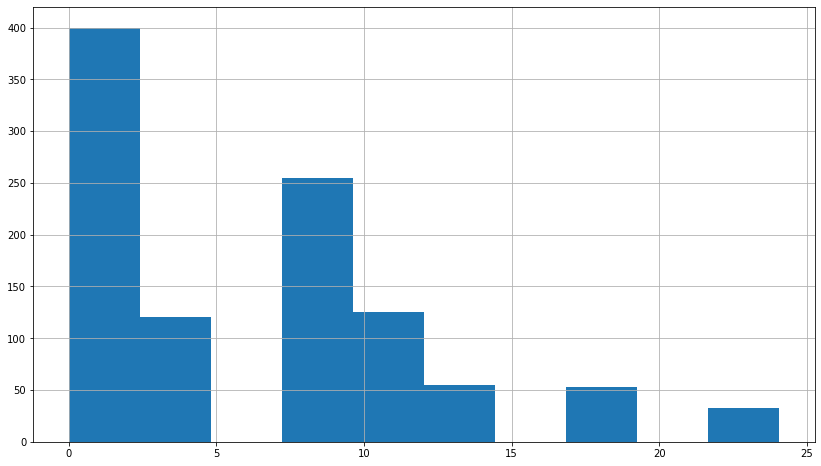

In [186]:
new_data['conversion'].hist()

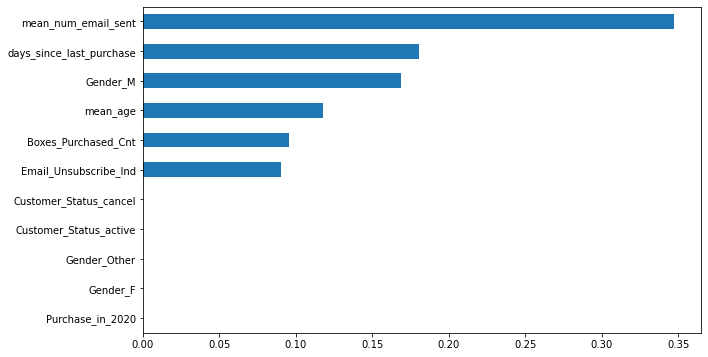

In [187]:


y = new_data['conversion_binary']
train = pd.get_dummies(new_data.drop(['Customer_ID', 'conversion_binary','Last_Purchase_Date', 'conversion', 'click_to_open_rate_avg', 'open_rate_avg'], axis = 1))

tree = DecisionTreeClassifier(max_depth = 5, class_weight = 'balanced', min_impurity_decrease = 0.001)
tree.fit(train, y)

feat_importances = pd.Series(tree.feature_importances_, 
                             index=train.columns)
feat_importances.sort_values().plot(kind='barh', figsize = (10,6))
plt.show()

In [188]:
def gen_model(n):
    if n == 'M':
        return 1
    else:
        return 0
data['Male'] = data['Gender'].apply(gen_model)
Male = data['Male']

data.head()

,Customer_ID,Gender,Boxes_Purchased_Cnt,Last_Purchase_Date,Email_Unsubscribe_Ind,Customer_Status,mean_age,mean_num_email_sent,open_rate_avg,click_to_open_rate_avg,Purchase_in_2020,days_since_last_purchase,conversion,conversion_binary,Male
0,1,F,2,2020-11-01,0,active,29,14,0.0,0.0,1,30,0.00,0,0
1,2,M,1,2020-05-01,1,cancel,49,14,62.5,5.0,1,214,3.12,0,1
2,3,M,2,2019-12-01,0,active,39,24,37.5,27.5,0,366,10.31,1,1
3,4,F,2,2020-08-01,1,active,55,24,0.0,0.0,1,122,0.00,0,0
4,5,M,2,2020-02-01,1,active,29,0,0.0,0.0,1,304,0.00,0,1


In [189]:

# Training
A = new_data.drop(['conversion_binary','Customer_ID','Last_Purchase_Date','Gender','mean_age','Email_Unsubscribe_Ind','conversion','Purchase_in_2020','Customer_Status', 'click_to_open_rate_avg', 'open_rate_avg'], axis=1)
B = new_data['conversion_binary']


from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

A_train = A_train.values
A_test = A_test.values
B_train = B_train.values
B_test = B_test.values

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

######
# Random Forest Classifier
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# grid_forest = GridSearchCV(RandomForestClassifier(), param_grid)
# grid_forest.fit(A_train, B_train)

# # RF best estimator
# RF2 = grid_forest.best_estimator_
########
RF2 = RandomForestClassifier()
RF2.fit(A_train, B_train)
training_score = cross_val_score(RF2, A_train, B_train, cv=5)
print("Classifier: ", RF2.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifier:  RandomForestClassifier Has a training score of 56.00000000000001 % accuracy score


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.47      0.44      0.45       103
           1       0.49      0.53      0.51       106

    accuracy                           0.48       209
   macro avg       0.48      0.48      0.48       209
weighted avg       0.48      0.48      0.48       209

0.48325358851674644
Confusion matrix
[[45 58]
 [50 56]]
Confusion matrix
[[103   0]
 [  0 106]]


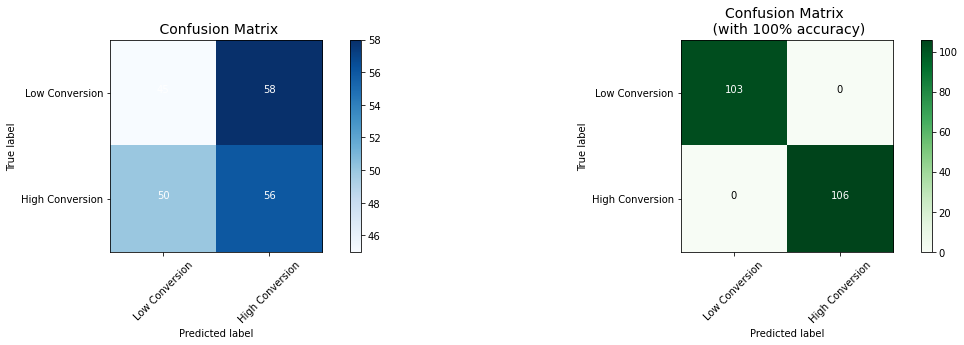

In [190]:
# Testing
from sklearn.metrics import accuracy_score

B_pred_RF = RF2.predict(A_test)

print('Random Forest Classifier:')
print(classification_report(B_test, B_pred_RF))
print(accuracy_score(B_test, B_pred_RF))


from sklearn.metrics import confusion_matrix

RF2_cm = confusion_matrix(B_test, B_pred_RF)
actual_cm = confusion_matrix(B_test,B_test)
labels = ['Low Conversion', 'High Conversion']




import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
# plot_confusion_matrix(RF2_cf, labels, title=" Confusion Matrix", cmap=plt.cm.Reds)

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(RF2_cm, labels, title=" Confusion Matrix", cmap=plt.cm.Blues)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

# Insights

We can segment the customers based on two factors; Age and Gender. If we segment them based on Age, the customers 55 and above are more likely to both open and click on the link in the emails sent to them.Therefore, for increasing the overall conversion rate, we need to target this group to get improvements.
On the other hand, the younger customers were less likely to open and click on the emails and the reason for that could be being subscribed to many marketing emails and not openning them at all.

The dataset has only investigated the customers who have made a purchase, therefore we can't evaluate the impact of sending emails to non-buying customers. For the customers present in the dataset, the ones who bought 1 or 2 boxes, were most likely to open and click on the email, whereas the ones who bought more (4 or 5) boxes were the least likely to open and click on the emails. The reason???

Looking at the conversion rate based on the number of emails we sent to the customers, we can see that 10 emails has the worst performance and 14 seems to be the optimum number in terms of both having the highest openning and clicking rates. It should it be noted that we do not get much improvements in click rates by sending more emails to the customers and the opening rates decrease too.

Looking at Gender:
Female customers are 20% more likely to open the emails compared to Males. Male customers seem to be the least interested in openning and clicking on the emails compared to the other two genders. Target: Female

**Conversion Rate Prediction**

We define the conversion rate as the multiplication of open_rate_avg and click_to_open_rate_avg and then convert it to binary using a threshhld of 5% based on the distribution of the data. The most important feature in determining the conversion rate is number of emails sent. Based on that, we train a RF model to predict the conversion rate of more than 5%. 